### Import required libraries

In [1]:
# Checking python version
from platform import python_version
print(python_version())

3.6.8


In [2]:
#! pip install squarify

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import squarify # for tree maps
%matplotlib inline

In [4]:
 !pip install --upgrade plotly

Requirement already up-to-date: plotly in c:\users\dhruva\appdata\local\conda\conda\envs\py36\lib\site-packages (3.7.1)


In [5]:
! pip install plotly

In [6]:
plotly.__version__

'3.7.1'

In [7]:
init_notebook_mode(connected=True)

# plotly 
- Modern Visualization for the data Era

#### Line Chart in plotly

- 2 numeric variables with 1-1 mapping, i.e in situations where we have 1 y value corresponding to 1 x value

In [8]:
x=[1, 2, 3]
y=[3, 1, 6]
iplot([go.Scatter(x=x,
                  y=y,
                  text = [str(i) for i in (zip(x,y))],
                             textposition = 'top center')])

###### You can export images to html file only with offline mode

https://plot.ly/python/static-image-export/

https://plot.ly/python/privacy/

In [9]:
from plotly.offline import plot

plot([go.Scatter(x=x,
                  y=y,
                  text = [str(i) for i in (zip(x,y))],
                             textposition = 'top center')],output_type='file' ,filename='temp-histogram.jpeg',image='jpeg',auto_open=False)

C:\Users\dhruva\AppData\Local\conda\conda\envs\py36\lib\site-packages\plotly\offline\offline.py:654: UserWarning:

Your filename `temp-histogram.jpeg` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\dhruva\\Documents\\machine_learning_models\\employee_churn\\temp-histogram.jpeg.html'

Note that this is a bare chart with no information, Later in the activity we will add title, x labels and y labels.

#### Basic Bar chart in plotly

- 1 Categorical variable

In [10]:
data = [go.Bar(
            x=['x', 'y', 'z'],
            y=[10, 20, 15])]
iplot(data)

#### Histogram in plotly

- 1 numeric variable

In [11]:
n = 1000
x = np.random.randn(n)
data = [go.Histogram(x=x,
       marker=dict(
        color='#CC0E1D',# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   # you can provide color in HEX format or rgb format, genrally programmers prefer HEX format as it is a single string value and easy to pass as a variable
    ))]
layout = go.Layout(title = "Histogram of {} random numbers".format(n))
fig = go.Figure(data= data, layout=layout)
iplot(fig)

#### Boxplot in plotly

- 1 Numeric variable

In [12]:
from IPython.display import Image
Image("img/boxplot.png")

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

In [13]:
np.random.seed(0) # Set seed for reproducibility
n = 10
r1 = np.random.randn(n)
r2 = np.random.randn(n)

trace0 = go.Box(
    y=r1,
    name = 'Box1',
    marker = dict(
        color = '#AA0505',
    )
)
trace1 = go.Box(
    y=r2,
    name = 'Box2',
    marker = dict(
        color = '#B97D10',
    )
)
data = [trace0, trace1]
layout = go.Layout(title = "Boxplot of 2 sets of random numbers")
fig = go.Figure(data= data, layout=layout)
iplot(fig)

#### Pie chart in plotly

- 1 Categorical variable

In [14]:
labels = ["Pre processing and Visualization", "Model Building", "Misc"]
values = [80,10,10]

trace = go.Pie(labels=labels, values=values)

layout = go.Layout(title = 'Percentage of time spent on Data Science projects')
data = [trace]
fig = go.Figure(data= data,layout=layout)
iplot(fig)

###### Note: We do not suggest you use pie chart, one reason being the total is not always obvious and second, having many levels will make the chart cluttered.

#### Scatter plot in plotly

- 2 numeric variables
- One x might have multiple corresponding y values

In [15]:
np.random.seed(0) 
n = 20
x=np.random.randint(0,100,n)
y=np.random.randint(0,100,n)
data = [go.Scatter(x=x,
                   y=y,
                   text = [str(i) for i in (zip(x,y))],
                             textposition = 'top center',
                   marker = dict(
            color = 'rgba(17, 157, 255, 0.8)',
            size = 10),
                   mode = 'markers')]
layout = go.Layout(title = 'Scatter plot')
fig = go.Figure(data= data,layout=layout)
iplot(fig)

### Tree map

https://plot.ly/python/treemaps/

!pip install squarify 

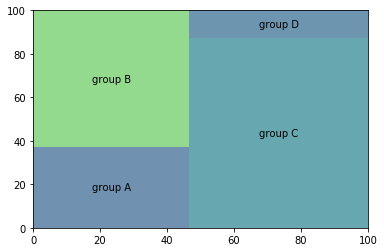

In [16]:
squarify.plot(sizes=[13,22,35,5], label=["group A", "group B", "group C", "group D"], alpha=.7 )
plt.show()

#### Heatmap

In [17]:
np.random.rand(2, 2)

array([[0.72063265, 0.58201979],
       [0.53737323, 0.75861562]])

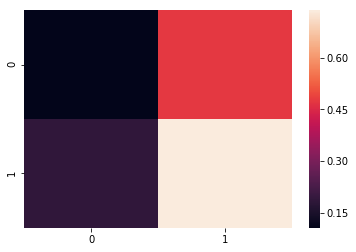

In [18]:
# trace = go.Heatmap(z=[[1, 20],
#                       [22, 1]],
#                    x=['Monday', 'Tuesday'],
#                    y=['Morning', 'Afternoon'])
# data=[trace]
# iplot(data)
sns.heatmap(np.random.rand(2, 2))

# Case Study

### Now let us use our new found skill to extract insights from a dataset

### hr_data Description

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [19]:
hr_data = pd.read_csv("Employee Attrition.csv")

### Pre-processing

In [20]:
hr_data.head()

,EmployeeNumber,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,...,Low,80,0,8,0,Bad,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,...,Very High,80,1,10,3,Better,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,...,Medium,80,0,7,3,Better,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,...,High,80,0,8,3,Better,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,...,Very High,80,1,6,3,Better,2,2,2,2


#### Checking the datatypes

In [21]:
hr_data.dtypes

EmployeeNumber               int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                     int64
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [22]:
hr_data.describe(include='all')

,EmployeeNumber,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470,1470,1470,...,1470,1470.0,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,2,3,NaN,3,NaN,5,6,4,...,4,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,Bachelor,Life Sciences,High,...,High,NaN,NaN,NaN,NaN,Better,NaN,NaN,NaN,NaN
freq,NaN,NaN,1233,1043,NaN,961,NaN,572,606,453,...,459,NaN,NaN,NaN,NaN,893,NaN,NaN,NaN,NaN
mean,735.500000,36.923810,NaN,NaN,802.485714,NaN,9.192517,NaN,NaN,NaN,...,NaN,80.0,0.793878,11.279592,2.799320,NaN,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,NaN,NaN,403.509100,NaN,8.106864,NaN,NaN,NaN,...,NaN,0.0,0.852077,7.780782,1.289271,NaN,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,NaN,NaN,102.000000,NaN,1.000000,NaN,NaN,NaN,...,NaN,80.0,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,NaN,NaN,465.000000,NaN,2.000000,NaN,NaN,NaN,...,NaN,80.0,0.000000,6.000000,2.000000,NaN,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,NaN,NaN,802.000000,NaN,7.000000,NaN,NaN,NaN,...,NaN,80.0,1.000000,10.000000,3.000000,NaN,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,NaN,NaN,1157.000000,NaN,14.000000,NaN,NaN,NaN,...,NaN,80.0,1.000000,15.000000,3.000000,NaN,9.000000,7.000000,3.000000,7.000000


In [23]:
hr_data.isnull().sum()

EmployeeNumber              0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

#### Checking the number of unique values in each column

In [24]:
for i in hr_data.columns:
    print ("Number of unique values in {} column are {} \n The unique values are {}".format(i, len(hr_data[i].unique()),hr_data[i].unique()))
    print ("---------------------- \n")

Number of unique values in EmployeeNumber column are 1470 
 The unique values are [   1    2    3 ... 1468 1469 1470]
---------------------- 

Number of unique values in Age column are 43 
 The unique values are [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
---------------------- 

Number of unique values in Attrition column are 2 
 The unique values are ['Yes' 'No']
---------------------- 

Number of unique values in BusinessTravel column are 3 
 The unique values are ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
---------------------- 

Number of unique values in DailyRate column are 886 
 The unique values are [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  85

Observations:
    - Most columns have fewer than 4 unique levels
    - NumCompaniesWorked and PercentSalaryHike have less than 15 values and we can convert these in to categorical values for analysis purposes, this is fairly subjective. You can also continue with these as integer values.

##### Replacing the integers with above values with the values in the description 

hr_data.Education = hr_data.Education.replace(to_replace=[1,2,3,4,5],value=['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])

hr_data.EnvironmentSatisfaction = hr_data.EnvironmentSatisfaction.replace(to_replace=[1,2,3,4],value=['Low', 'Medium', 'High', 'Very High'])

hr_data.JobInvolvement = hr_data.JobInvolvement.replace(to_replace=[1,2,3,4],value=['Low', 'Medium', 'High', 'Very High'])

hr_data.JobSatisfaction = hr_data.JobSatisfaction.replace(to_replace=[1,2,3,4],value=['Low', 'Medium', 'High', 'Very High'])

hr_data.PerformanceRating = hr_data.PerformanceRating.replace(to_replace=[1,2,3,4],value=['Low', 'Good', 'Excellent', 'Outstanding'])

hr_data.RelationshipSatisfaction = hr_data.RelationshipSatisfaction.replace(to_replace=[1,2,3,4],value=['Low', 'Medium', 'High', 'Very High'])

hr_data.WorkLifeBalance = hr_data.WorkLifeBalance.replace(to_replace=[1,2,3,4],value=['Bad', 'Good', 'Better', 'Best'])

In [25]:
Education_dict = {1:'Below College',
           2:'College',
           3:'Bachelor',
           4:'Master',
           5:'Doctor',
           }
EnvironmentSatisfaction_dict = {1:'Low',
           2:'Medium',
           3:'High',
           4:'Very High',
           }

JobInvolvement_dict = {1:'Low',
           2:'Medium',
           3:'High',
           4:'Very High',
           }

JobSatisfaction_dict = {1:'Low',
           2:'Medium',
           3:'High',
           4:'Very High',
           }

PerformanceRating_dict = {1:'Low',
           2:'Good',
           3:'Excellent',
           4:'Outstanding',
           }

RelationshipSatisfaction_dict = {1:'Low',
           2:'Medium',
           3:'High',
           4:'Very High',
           }

WorkLifeBalance_dict = {1:'Bad',
           2:'Good',
           3:'Better',
           4:'Best',
           }

In [26]:
hr_data = hr_data.replace({"Education":Education_dict,
                "EnvironmentSatisfaction":EnvironmentSatisfaction_dict,
                "JobInvolvement":JobInvolvement_dict,
                "JobSatisfaction":JobSatisfaction_dict,
                 
                "PerformanceRating":PerformanceRating_dict,
                 
                "RelationshipSatisfaction":RelationshipSatisfaction_dict,
                
                "WorkLifeBalance":WorkLifeBalance_dict,
                 
                })

##### Extract categorical columns

Columns with 15 or less levels are considered as categorical columns for the purpose of this analysis

We have decided to treat all the columns with 15 or less levels as categorical columns, the following few lines of code extract all the columns which satisy the condition.

In [27]:
cat_cols = []
for i in hr_data.columns:
    if hr_data[i].dtype =='object' or len(np.unique(hr_data[i]))<=15 : # if the number of levels is less that 15 considering the column as categorial
        cat_cols.append(i)
        print("{} : {} : {} ".format(i,len(np.unique(hr_data[i])),np.unique(hr_data[i])))

Attrition : 2 : ['No' 'Yes'] 
BusinessTravel : 3 : ['Non-Travel' 'Travel_Frequently' 'Travel_Rarely'] 
Department : 3 : ['Human Resources' 'Research & Development' 'Sales'] 
Education : 5 : ['Bachelor' 'Below College' 'College' 'Doctor' 'Master'] 
EducationField : 6 : ['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree'] 
EnvironmentSatisfaction : 4 : ['High' 'Low' 'Medium' 'Very High'] 
Gender : 2 : ['Female' 'Male'] 
JobInvolvement : 4 : ['High' 'Low' 'Medium' 'Very High'] 
JobLevel : 5 : [1 2 3 4 5] 
JobRole : 9 : ['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative'] 
JobSatisfaction : 4 : ['High' 'Low' 'Medium' 'Very High'] 
MaritalStatus : 3 : ['Divorced' 'Married' 'Single'] 
NumCompaniesWorked : 10 : [0 1 2 3 4 5 6 7 8 9] 
Over18 : 1 : ['Y'] 
OverTime : 2 : ['No' 'Yes'] 
PercentSalaryHike : 15 : [11 12 13 14 15 16

##### Print the categorical column names 

In [28]:
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

##### Check if the above columns are categorical in the dataset

In [29]:
hr_data[cat_cols].dtypes

Attrition                   object
BusinessTravel              object
Department                  object
Education                   object
EducationField              object
EnvironmentSatisfaction     object
Gender                      object
JobInvolvement              object
JobLevel                     int64
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel             int64
TrainingTimesLastYear        int64
WorkLifeBalance             object
dtype: object

##### Type Conversion

- n dimensional type convesrion to 'category' is not implemented yet

In [30]:
for i in cat_cols:
    hr_data[i] = hr_data[i].astype('category')

#### Categorical attributes summary

In [31]:

hr_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
EmployeeNumber,1470,NaN,NaN,NaN,735.5,424.497,1,368.25,735.5,1102.75,1470
Age,1470,NaN,NaN,NaN,36.9238,9.13537,18,30,36,43,60
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470,NaN,NaN,NaN,802.486,403.509,102,465,802,1157,1499
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470,NaN,NaN,NaN,9.19252,8.10686,1,2,7,14,29
Education,1470,5,Bachelor,572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,1470,4,High,453,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Extracting Numeric Columns

In [32]:
num_cols = [i for i in hr_data.columns if i not in cat_cols]

In [33]:
hr_data[cat_cols].dtypes

Attrition                   category
BusinessTravel              category
Department                  category
Education                   category
EducationField              category
EnvironmentSatisfaction     category
Gender                      category
JobInvolvement              category
JobLevel                    category
JobRole                     category
JobSatisfaction             category
MaritalStatus               category
NumCompaniesWorked          category
Over18                      category
OverTime                    category
PercentSalaryHike           category
PerformanceRating           category
RelationshipSatisfaction    category
StandardHours               category
StockOptionLevel            category
TrainingTimesLastYear       category
WorkLifeBalance             category
dtype: object

In [34]:
hr_data.head()

,EmployeeNumber,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,...,Low,80,0,8,0,Bad,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,...,Very High,80,1,10,3,Better,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,...,Medium,80,0,7,3,Better,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,...,High,80,0,8,3,Better,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,...,Very High,80,1,6,3,Better,2,2,2,2


# _Exploratory Data Analysis_

## Univariate Analysis

### 1.  What is the attrition rate in the company?

##### Attrition in numbers (pandas)

In [35]:
hr_data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

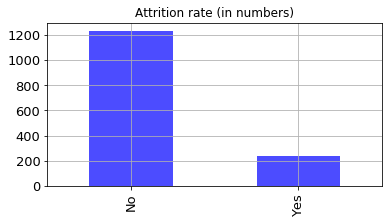

In [36]:
plt.figure()
hr_data.Attrition.value_counts().plot(kind='bar',
                                  figsize=(6,3),
                                  color="blue",
                                  alpha = 0.7,
                                  fontsize=13)
plt.title('Attrition rate (in numbers)')
plt.grid()
plt.show()

* This is one way to tell matplotlib to plot the graphs in the notebook

##### Attrition rate in percentage (pandas)

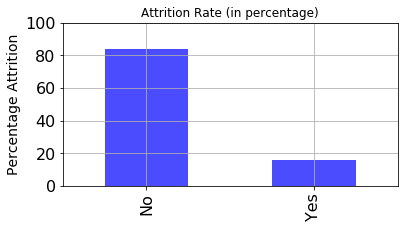

In [37]:
((hr_data.Attrition.value_counts()/sum(hr_data.Attrition.value_counts()))*100).plot(kind='bar',
                                  figsize=(6,3),
                                  color=["blue"],
                                  alpha = 0.7,
                                  fontsize=16)

plt.ylim([0,100])
plt.title('Attrition Rate (in percentage)')
plt.ylabel('Percentage Attrition',fontsize = 14)
plt.grid(True)
plt.show()

##### plotly In percentages

In [38]:
temp = hr_data.Attrition.value_counts()
trace = go.Bar(x=temp.index,
               y= np.round(temp.astype(float)/temp.values.sum(),2),
               text = np.round(temp.astype(float)/temp.values.sum(),2),
               textposition = 'auto',
               name = 'Attrition')
data = [trace]
layout = go.Layout(
    autosize=False,
    width=600,
    height=400,title = "Attrition Distribution"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)
del temp

### 2. What is the Gender Distribution in the company?

In [39]:
temp = hr_data.Gender.value_counts()
temp

Male      882
Female    588
Name: Gender, dtype: int64

In [40]:
data = [go.Bar(
            x=temp.index,
            y= np.round(temp.astype(float)/temp.values.sum(),2),
            text = np.round(temp.astype(float)/temp.values.sum(),2),
            textposition = 'auto',
    )]
layout = go.Layout(
    autosize=False,
    width=600,
    height=400,title = "Gender Distribution",
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)
del temp

In [41]:
temp = hr_data.Gender.value_counts()
temp

Male      882
Female    588
Name: Gender, dtype: int64

###### Steps to create a bar chart with counts for a categorical variable in plotly

- Steps to create a bar chart with counts for a categorical variable
    - create an object and store the counts (optional)
    - create  a bar object
        - pass the x values
        - pass the y values
        - optional :
            - text to be displayed
            - text position
            - color of the bar
            - name of the bar (trace in plotly terminology)
    - create a layout object
        - title - font and size of title
        - x axis - font and size of xaxis text
        - y axis - font and size of yaxis text
    - create a figure object:
        - add data
        - add layout
    - plot the figure object

In [42]:
# create a table with value counts
temp = hr_data.Gender.value_counts()
# creating a Bar chart object of plotly
data = [go.Bar(
        x=temp.index.astype(str), # x axis values
        y=np.round(temp.values.astype(float)/temp.values.sum(),4)*100, # y axis values
        text = ['{}%'.format(i) for i in np.round(temp.values.astype(float)/temp.values.sum(),4)*100],
    # text to be displayed on the bar, we are doing this to display the '%' symbol along with the number on the bar
        textposition = 'auto', # specify at which position on the bar the text should appear
    marker = dict(color = '#0047AB'),)] # change color of the bar
# color used here Cobalt Blue

# these are used to define the layout options

layout = go.Layout(
    autosize=False, # auto size the graph? use False if you are specifying the height and width
    width=800, # height of the figure in pixels
    height=600, # height of the figure in pixels
    title = "Distribution of {} column".format('Gender'), # title of the figure
    # more granular control on the title font 
    titlefont=dict( 
        family='Courier New, monospace', # font family
        size=16, # size of the font
        color='black' # color of the font
    ),
    # granular control on the axes objects 
    xaxis=dict( 
    tickfont=dict(
        family='Courier New, monospace', # font family
        size=16, # size of ticks displayed on the x axis
        color='black'  # color of the font
        )
    ),
    yaxis=dict(
    title='Percentage',
    titlefont=dict(
        size=16,
        color='black'
        ),
    tickfont=dict(
        family='Courier New, monospace', # font family
        size=16, # size of ticks displayed on the y axis
        color='black' # color of the font
        )
    ),
    font = dict(
        family='Courier New, monospace', # font family
        color = "white",# color of the font
        size = 12 # size of the font displayed on the bar
        )  
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig)

del temp

###  We will save the above layout in an object and define a function for future use

In [43]:
def generate_layout_bar(col_name):
    layout_bar = go.Layout(
        autosize=False, # auto size the graph? use False if you are specifying the height and width
        width=800, # height of the figure in pixels
        height=600, # height of the figure in pixels
        title = "Distribution of {} column".format(col_name), # title of the figure
        # more granular control on the title font 
        titlefont=dict( 
            family='Courier New, monospace', # font family
            size=14, # size of the font
            color='black' # color of the font
        ),
        # granular control on the axes objects 
        xaxis=dict( 
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the x axis
            color='black'  # color of the font
            )
        ),
        yaxis=dict(
#         range=[0,100],
            title='Percentage',
            titlefont=dict(
                size=14,
                color='black'
            ),
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the y axis
            color='black' # color of the font
            )
        ),
        font = dict(
            family='Courier New, monospace', # font family
            color = "white",# color of the font
            size = 12 # size of the font displayed on the bar
                )  
        )
    return layout_bar

### Defining a function to plot the bar charts

In [44]:
def plot_bar(col_name):
    # create a table with value counts
    temp = hr_data[col_name].value_counts()
    # creating a Bar chart object of plotly
    data = [go.Bar(
            x=temp.index.astype(str), # x axis values
            y=np.round(temp.values.astype(float)/temp.values.sum(),4)*100, # y axis values
            text = ['{}%'.format(i) for i in np.round(temp.values.astype(float)/temp.values.sum(),4)*100],
        # text to be displayed on the bar, we are doing this to display the '%' symbol along with the number on the bar
            textposition = 'auto', # specify at which position on the bar the text should appear
        marker = dict(color = '#0047AB'),)] # change color of the bar
    # color used here Cobalt Blue
     
    layout_bar = generate_layout_bar(col_name=col_name)

    fig = go.Figure(data=data, layout=layout_bar)
    return iplot(fig)
    

### 3.How many people travel? (BusinessTravel)


In [45]:
plot_bar('BusinessTravel')

### 4. Which department has the highest number of employees? (Department)

In [46]:
plot_bar('Department')

### 5. What is the most common educational background of the employees (EducationField)

In [47]:
plot_bar('EducationField')

### 6. In what roles are the employees working and what is the common job role? (JobRole)

In [48]:
plot_bar('JobRole')

### 7. Is the workforce in the company young? (Age)

In [49]:
plot_bar('Age')

- Age is a continuous variable, it makes more sense to plot a histogram rather than a bar chart

#### Histogram

In [50]:
data = [go.Histogram(x=hr_data.Age,
       marker=dict(
        color='#CC0E1D',# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   `
    ))]
layout = go.Layout(title = "Histogram of Age".format(n))
fig = go.Figure(data= data, layout=layout)
iplot(fig)

### 8. What is the income distribution in the company?(MonthlyIncome)

In [51]:
data = [go.Histogram(x=hr_data.MonthlyIncome,
       marker=dict(
        color='#CC0E1D',# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   
    ))]
layout = go.Layout(title = "Histogram of Income".format(n))
fig = go.Figure(data= data, layout=layout)
iplot(fig)

Observations: 
    - We see that the income column has a long tailed distribution
    - Binning might give better insghts into the distribution

##### Let us bin the Income column

In [52]:
# np.digitize(hr_data.MonthlyIncome,list(range(0,hr_data.MonthlyIncome.max(),2500)),right=True)

In [53]:
hr_data['Income_Bins'] = np.digitize(hr_data.MonthlyIncome,list(range(0,hr_data.MonthlyIncome.max()+10,2500)),right=True)

In [54]:
list(range(0,hr_data.MonthlyIncome.max()+10,2500))

[0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]

In [55]:
hr_data['Income_Bins'].value_counts()

2    523
3    310
1    226
4    130
5     91
8     81
6     57
7     52
Name: Income_Bins, dtype: int64

In [56]:
hr_data['Income_Bins'] = hr_data['Income_Bins'].replace(to_replace=[1,2,3,4,5,6,7,8],
                                                        value=['Bin1','Bin2','Bin3',
                                                                               'Bin4','Bin5','Bin6','Bin7','Bin8'])

In [57]:
temp = hr_data['Income_Bins'].value_counts()
temp=temp.sort_index()

In [58]:
trace1 = go.Bar(x = temp.index,
               y = (temp.values.astype(float)/sum(temp.values))*100,
                text = ['{}%'.format(i) for i in np.round(temp.values.astype(float)/temp.values.sum(),4)*100],
    # text to be displayed on the bar, we are doing this to display the '%' symbol along with the number on the bar
                textposition = 'auto',
               name = 'Income_Bins')
data = [trace1]
# these are used to define the layout options

layout = generate_layout_bar('Income_Bins')

fig = go.Figure(data=data, layout=layout)
iplot(fig)
print(list(range(0,hr_data.MonthlyIncome.max()+10,2500)))

[0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]


Observe the last columns

## Bivariate analysis

### 1. Is a particular gender travelling more distance than other?(Gender and Distance from home)

In [59]:
trace1 = go.Box(y = hr_data.DistanceFromHome[hr_data.Gender=='Male'],name = 'Male',
                boxpoints = 'all',jitter = 1
               )
# boxpoints is used to specify the points to plot
# jitter is used to specify how far from each should the points be
trace2 = go.Box(y = hr_data.DistanceFromHome[hr_data.Gender=='Female'],name= 'Female',
               boxpoints = 'all',jitter = 1
               )
data = [trace1,trace2]
layout = go.Layout(width = 1000,
                   height = 500,title = 'Distance from home and Gender')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

#### Distance Bins and Gender

In [60]:
hr_data['Distance_Bins']=(np.digitize(hr_data.DistanceFromHome,[0,5,15,np.max(hr_data.DistanceFromHome)],right=True))

In [61]:
temp = hr_data.groupby(['Distance_Bins','Gender']).size().to_frame()
temp = temp.reset_index()
temp.columns = ['Distance_Bins','Gender','Count']
temp

,Distance_Bins,Gender,Count
0,1,Female,257
1,1,Male,375
2,2,Female,200
3,2,Male,309
4,3,Female,131
5,3,Male,198


In [62]:
trace1 = go.Bar(x = temp.Distance_Bins[temp.Gender=='Male'],
               y = temp.Count[temp.Gender=='Male'],
                text = temp.Count[temp.Gender=='Male'],
                textposition = 'auto',
               name = 'Male')
trace2 = go.Bar(x = temp.Distance_Bins[temp.Gender=='Female'],
               y = temp.Count[temp.Gender=='Female'],
                text = temp.Count[temp.Gender=='Female'],
                textposition = 'auto',
               name = 'Female')
data = [trace1,trace2]
layout = go.Layout(width = 700,
                   height = 500,title = 'Gender and Distance bins',
                  yaxis = dict(title='Count'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Obsetvations:
    - Irrespective of the distance bin, there is a global pattern i.e every bin has more male employees, this has to do with the actual distribution of gender in the data.
  

### 2. Are employees working overtime getting better ratings? (OverTime and Performance Rating.)


In [63]:
temp = hr_data.groupby(['OverTime','PerformanceRating']).size().to_frame()
temp = temp.reset_index()
temp.columns = ['OverTime','PerformanceRating','Count']
temp

,OverTime,PerformanceRating,Count
0,No,Excellent,893
1,No,Outstanding,161
2,Yes,Excellent,351
3,Yes,Outstanding,65


In [64]:
hr_data.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [65]:
trace1 = go.Bar(x = temp.OverTime[temp.PerformanceRating=='Excellent'],
               y = temp.Count[temp.PerformanceRating=='Excellent']/temp.Count.sum(),
               name = 'Excellent')
trace2 = go.Bar(x = temp.OverTime[temp.PerformanceRating=='Outstanding'],
               y = temp.Count[temp.PerformanceRating=='Outstanding']/temp.Count.sum(),
               name = 'Outstanding')
data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'OverTime and PerformanceRating')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

All the percentages add up to one, so we can compare the numbers globally

### 3. Does working longer with a manager have any relationship with Job satisfaction? (YearsWithCurrManager, JobSatisfaction)


In [66]:
yearscurrman_jobsat = hr_data.groupby(['YearsWithCurrManager','JobSatisfaction']).size().to_frame()
yearscurrman_jobsat = yearscurrman_jobsat.reset_index()
yearscurrman_jobsat.columns = ['YearsWithCurrManager','JobSatisfaction','Counts']

In [67]:
np.random.seed(0)
yearscurrman_jobsat.sample(frac =0.1)

,YearsWithCurrManager,JobSatisfaction,Counts
45,11,Low,5
28,7,High,65
29,7,Low,43
55,13,Very High,2
63,17,High,1
31,7,Very High,66
51,12,Very High,5


In [68]:
tracelow = go.Bar(x = yearscurrman_jobsat.YearsWithCurrManager[yearscurrman_jobsat.JobSatisfaction=='Low'],
               y = yearscurrman_jobsat.Counts[yearscurrman_jobsat.JobSatisfaction=='Low'],
                text = yearscurrman_jobsat.Counts[yearscurrman_jobsat.JobSatisfaction=='Low'],
                textposition = 'auto',
               name = 'Low')

tracemedium = go.Bar(x = yearscurrman_jobsat.YearsWithCurrManager[yearscurrman_jobsat.JobSatisfaction=='Medium'],
               y = yearscurrman_jobsat.Counts[yearscurrman_jobsat.JobSatisfaction=='Medium'],
                text = yearscurrman_jobsat.Counts[yearscurrman_jobsat.JobSatisfaction=='Medium'],
                textposition = 'auto',
               name = 'Medium')

traceHigh = go.Bar(x = yearscurrman_jobsat.YearsWithCurrManager[yearscurrman_jobsat.JobSatisfaction=='High'],
               y = yearscurrman_jobsat.Counts[yearscurrman_jobsat.JobSatisfaction=='High'],
                text = yearscurrman_jobsat.Counts[yearscurrman_jobsat.JobSatisfaction=='High'],
                textposition = 'auto',
               name = 'High')

traceVHigh = go.Bar(x = yearscurrman_jobsat.YearsWithCurrManager[yearscurrman_jobsat.JobSatisfaction=='Very High'],
               y = yearscurrman_jobsat.Counts[yearscurrman_jobsat.JobSatisfaction=='Very High'],
                text = yearscurrman_jobsat.Counts[yearscurrman_jobsat.JobSatisfaction=='Very High'],
                textposition = 'auto',
               name = 'Very High')


data = [tracelow, tracemedium, traceHigh, traceVHigh]
layout = go.Layout(width = 1000,
#                    barmode='stack',
                   height = 600,title = 'YearsWithCurrManager and Job Satisfaction',
                  xaxis =  dict(title = 'YearsWithCurrManager'),
                   yaxis =  dict(title = 'Counts',range=[0, yearscurrman_jobsat.Counts.max()+10]))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

We observe that the red bars are higher than the green bars only after 2 years , we can infer that employees generally tend to be comfortable working with the manager after 2 years.

### 4. Are married employees staying far from the office? (Marital status and Distance from home)

In [69]:
hr_data.MaritalStatus.unique()

[Single, Married, Divorced]
Categories (3, object): [Single, Married, Divorced]

In [70]:
hr_data.DistanceFromHome[hr_data.MaritalStatus=='Divorced'].describe()

count    327.000000
mean       9.110092
std        7.728133
min        1.000000
25%        2.000000
50%        7.000000
75%       13.000000
max       29.000000
Name: DistanceFromHome, dtype: float64

In [71]:
hr_data.DistanceFromHome[hr_data.MaritalStatus=='Married'].describe()

count    673.000000
mean       9.459138
std        8.348717
min        1.000000
25%        2.000000
50%        7.000000
75%       15.000000
max       29.000000
Name: DistanceFromHome, dtype: float64

In [72]:
hr_data.DistanceFromHome[hr_data.MaritalStatus=='Single'].describe()

count    470.000000
mean       8.868085
std        8.015952
min        1.000000
25%        2.000000
50%        7.000000
75%       12.000000
max       29.000000
Name: DistanceFromHome, dtype: float64

In [73]:
tracediv = go.Box(y = hr_data.DistanceFromHome[hr_data.MaritalStatus=='Divorced'], name = 'DistanceFromHome')
tracemarried = go.Box(y = hr_data.DistanceFromHome[hr_data.MaritalStatus=='Married'], name= 'Married')
tracesin = go.Box(y = hr_data.DistanceFromHome[hr_data.MaritalStatus=='Single'], name= 'Single')

data = [tracediv,tracemarried,tracesin]
layout = go.Layout(width = 800,
                   height = 500,title = 'Distance from home and and Marital Status')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

### 5. Is there any relationship between Attrition and Gender?

In [74]:
Gender_Attrition = hr_data.groupby(['Gender','Attrition']).size().to_frame()
Gender_Attrition = Gender_Attrition.reset_index()
Gender_Attrition.columns = ['Gender','Attrition','Count']
Gender_Attrition

,Gender,Attrition,Count
0,Female,No,501
1,Female,Yes,87
2,Male,No,732
3,Male,Yes,150


In [75]:
trace1 = go.Bar(x = Gender_Attrition.Gender[Gender_Attrition.Attrition=='Yes'],
               y = Gender_Attrition.Count[Gender_Attrition.Attrition=='Yes'],
                text = Gender_Attrition.Count[Gender_Attrition.Attrition=='Yes'],
                textposition = 'auto',
               name = 'Yes')
trace2 = go.Bar(x = Gender_Attrition.Gender[Gender_Attrition.Attrition=='No'],
               y = Gender_Attrition.Count[Gender_Attrition.Attrition=='No'],
                 text = Gender_Attrition.Count[Gender_Attrition.Attrition=='Yes'],
                textposition = 'auto',
               name = 'No')
data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'Gender and Attrition')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### 6. Employees who spend more years in the company tend to leave. Verify if this is true.(Years at company and Attrition)

In [76]:
hr_data.YearsAtCompany[hr_data.Attrition=='Yes'].describe()


count    237.000000
mean       5.130802
std        5.949984
min        0.000000
25%        1.000000
50%        3.000000
75%        7.000000
max       40.000000
Name: YearsAtCompany, dtype: float64

In [77]:
hr_data.YearsAtCompany[hr_data.Attrition=='No'].describe()

count    1233.000000
mean        7.369019
std         6.096298
min         0.000000
25%         3.000000
50%         6.000000
75%        10.000000
max        37.000000
Name: YearsAtCompany, dtype: float64

In [78]:
trace1 = go.Box(y = hr_data.YearsAtCompany[hr_data.Attrition=='Yes'],name = 'Yes',
#                 boxpoints = 'all',jitter = 1
               )
# boxpoints is used to specify the points to plot
# jitter is used to specify how far from each should the points be
trace2 = go.Box(y = hr_data.YearsAtCompany[hr_data.Attrition=='No'],name= 'No',
#                boxpoints = 'all',jitter = 1
               )
data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 500,title = 'YearsAtCompany and Attrition')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

### 7 . Is a particular age group more prone to leaving the company? (Age and Attrition)

In [79]:
hr_data.Age[hr_data.Attrition=='Yes'].describe()

count    237.000000
mean      33.607595
std        9.689350
min       18.000000
25%       28.000000
50%       32.000000
75%       39.000000
max       58.000000
Name: Age, dtype: float64

In [80]:
hr_data.Age[hr_data.Attrition=='No'].describe()

count    1233.000000
mean       37.561233
std         8.888360
min        18.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [81]:
trace1 = go.Box(y = hr_data.Age[hr_data.Attrition=='Yes'],name = 'Yes')
trace2 = go.Box(y = hr_data.Age[hr_data.Attrition=='No'],name= 'No')

data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 500,title = 'Age and Attrition')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

You can also bin the age column and do the same

### 8. Employees earning less tend to leave the company. Verify if this is true. (Monthly Income vs Attrition)


In [82]:
hr_data.MonthlyIncome[hr_data.Attrition=='Yes'].describe()

count      237.000000
mean      4787.092827
std       3640.210367
min       1009.000000
25%       2373.000000
50%       3202.000000
75%       5916.000000
max      19859.000000
Name: MonthlyIncome, dtype: float64

In [83]:
hr_data.MonthlyIncome[hr_data.Attrition=='No'].describe()

count     1233.000000
mean      6832.739659
std       4818.208001
min       1051.000000
25%       3211.000000
50%       5204.000000
75%       8834.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [84]:
trace1 = go.Box(y = hr_data.MonthlyIncome[hr_data.Attrition=='Yes'],name = 'Yes')
trace2 = go.Box(y = hr_data.MonthlyIncome[hr_data.Attrition=='No'],name= 'No')

data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 500,title = 'Income and Attrition')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [85]:
num_cols

['EmployeeNumber',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

### 9. How do Age and Monthly Income vary?

In [86]:
hr_data[['Age','MonthlyIncome']].corr()

,Age,MonthlyIncome
Age,1.000000,0.497855
MonthlyIncome,0.497855,1.000000


In [87]:
trace = go.Scatter(x=hr_data.Age ,
                  y= hr_data.MonthlyIncome,
                  name = 'Age and MonthlyIncome',
                  mode= 'markers')
data = [trace]
layout = go.Layout(title = ' Age and Monthly Income distribution',
                  xaxis = dict(title = 'Age'),
                  yaxis = dict(title = 'Monthly Income'))
fig = go.Figure(data=data,layout=layout)
iplot(fig)


### 10. Does YearsWithCurrManager  have to do anything with YearsSinceLastPromotion?


In [88]:
hr_data[['YearsWithCurrManager','YearsSinceLastPromotion']].corr()

,YearsWithCurrManager,YearsSinceLastPromotion
YearsWithCurrManager,1.000000,0.510224
YearsSinceLastPromotion,0.510224,1.000000


In [89]:
trace = go.Scatter(x=hr_data.YearsWithCurrManager ,
                  y= hr_data.YearsSinceLastPromotion,
                  name = 'YearsWithCurrManager and YearsSinceLastPromotion',
                  mode= 'markers')
data = [trace]
layout = go.Layout(title = ' YearsWithCurrManager and YearsSinceLastPromotion distribution',
                  xaxis = dict(title = 'YearsWithCurrManager'),
                  yaxis = dict(title = 'YearsSinceLastPromotion'))
fig = go.Figure(data=data,layout=layout)
iplot(fig)

### 3 variables

### 1. What is the relationship between number of companies worked , age and attrition.(Number of companies worked, Age, Attrition.)

In [90]:
hr_data.NumCompaniesWorked.value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

###### Is a particular gender of a particular age group prone to leave the company?

In [91]:
data = []
for i in hr_data.NumCompaniesWorked.unique():
    data.append(i)

In [92]:
data

[8, 1, 6, 9, 0, 4, 5, 2, 7, 3]

In [93]:
data = []
for i in np.sort(hr_data.NumCompaniesWorked.unique()):
        data.append(go.Box(y = hr_data.Age[hr_data.NumCompaniesWorked==i][hr_data.Attrition=='Yes'],
                           marker = dict(
        color = '#CC0E1D',
    ),
                           name = "{}- Yes".format(str(i))))
        data.append(go.Box(y = hr_data.Age[hr_data.NumCompaniesWorked==i][hr_data.Attrition=='No'],
                           marker = dict(
        color = '#588061',
    ),
                           name = "{}- No".format(str(i))))

layout = go.Layout(
autosize=False, # auto size the graph? use False if you are specifying the height and width
width=1000, # height of the figure in pixels
height=600, # height of the figure in pixels
title = "Boxplot of {} column based on {} ".format('Age','NumCompaniesWorked'), # title of the figure
# more granular control on the title font 
    titlefont=dict( 
        family='Courier New, monospace', # font family
        size=14, # size of the font
        color='black' # color of the font
    ),
    # granular control on the axes objects 
    xaxis=dict( 
        title='Number of companies worked and attrition',
    tickfont=dict(
        family='Courier New, monospace', # font family
        size=10, # size of ticks displayed on the x axis
        color='black'  # color of the font
    )
),
yaxis=dict(
#         range=[0,100],
    title='Age',
    titlefont=dict(
        size=14,
        color='black'
    ),
    tickfont=dict(
        family='Courier New, monospace', # font family
        size=14, # size of ticks displayed on the y axis
        color='black' # color of the font
    )
),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)        

Observe the last two plots, how are they different from others?

### Creating new features and plotting

### 2. What is the relationship between total working years, number of companies worked and attrition (Total Working Years , Number of companies and Attrition.)


#### Generate a new feature  using TotalWorkingYears and Number of companies worked

In [94]:
hr_data['TotalWorkingYears_NumCompWorked'] = np.round(hr_data.TotalWorkingYears / (hr_data.NumCompaniesWorked.astype(int)+1)) # adding 1 to avoid dividng by 0

In [95]:
hr_data.TotalWorkingYears_NumCompWorked.head()

0    1.0
1    5.0
2    1.0
3    4.0
4    1.0
Name: TotalWorkingYears_NumCompWorked, dtype: float64

In [96]:
trace0 = go.Box(y= hr_data.TotalWorkingYears_NumCompWorked[hr_data.Attrition=='Yes'],name = 'Yes')
trace1 = go.Box(y = hr_data.TotalWorkingYears_NumCompWorked[hr_data.Attrition=='No'],name = 'No')
data =[trace0,trace1]
layout = go.Layout(width = 900,
                   height = 600,
                   title = 'Ratio of Age and Number of Companies worked vs Attrition',
                    titlefont=dict( 
        family='Courier New, monospace', # font family
        size=14, # size of the font
        color='black' # color of the font
    ),
    # granular control on the axes objects 
    xaxis=dict( 
    tickfont=dict(
        family='Courier New, monospace', # font family
        size=10, # size of ticks displayed on the x axis
        color='black'  # color of the font
    )
),
yaxis=dict(
#         range=[0,100],
    title='(TotalWorkingYears/NumCompWorked)',
    titlefont=dict(
        size=14,
        color='black'
    ),
    tickfont=dict(
        family='Courier New, monospace', # font family
        size=14, # size of ticks displayed on the y axis
        color='black' # color of the font
    )
),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### 3. Do marital status and distance from home affect attrition? (Marital Status, Distance From Home and Attrition)


In [97]:
data = []
for i in np.sort(hr_data.MaritalStatus.unique()):
        data.append(go.Box(y = hr_data.DistanceFromHome[hr_data.MaritalStatus==i][hr_data.Attrition=='Yes'],
                           marker = dict(color = '#CC0E1D', # red),
                                        ),
                                         name = "{}- Yes".format(str(i)))
                   )
        
        data.append(go.Box(y = hr_data.DistanceFromHome[hr_data.MaritalStatus==i][hr_data.Attrition=='No'],
                           marker = dict(color = '#588061', # green),
                                        ),
                                         name = "{}- No".format(str(i)))
                   )

layout = go.Layout(
    autosize=False, # auto size the graph? use False if you are specifying the height and width
    width=1000, # height of the figure in pixels
    height=600, # height of the figure in pixels
    title = "Boxplot of {} column based on {} ".format('DistanceFromHome','MaritalStatus'), # title of the figure
    # more granular control on the title font 
    titlefont=dict( 
        family='Courier New, monospace', # font family
        size=14, # size of the font
        color='black' # color of the font
        ),
    # granular control on the axes objects 
    xaxis=dict( 
    tickfont=dict(
        family='Courier New, monospace', # font family
        size=10, # size of ticks displayed on the x axis
        color='black'  # color of the font
        )
    ),
    yaxis=dict(
#         range=[0,100],
    title='Distance travelled',
    titlefont=dict(
        size=14,
        color='black'
        ),
    tickfont=dict(
        family='Courier New, monospace', # font family
        size=14, # size of ticks displayed on the y axis
        color='black' # color of the font
    )
    ),
    )
fig = go.Figure(data=data, layout=layout)
iplot(fig)        

### Extras

### >3 variables, 3D plots.

In [98]:
n = 1500
# Extracting th x, y ,z  values 
temp = hr_data.iloc[0:n,]
temp.shape

(1470, 37)


x-axis > PercentSalaryHike

x-axis > YearsAtCompany

x-axis > DistanceFromHome

Color > Attrition

Size > DistanceFromHome


In [99]:
# trace1 = go.Scatter3d(
#     x=temp.PercentSalaryHike[temp.Attrition=='Yes'],
#     y=temp.YearsAtCompany[temp.Attrition=='Yes'],
#     z=temp.DistanceFromHome[temp.Attrition=='Yes'],
#     mode='markers',name ='Yes',
#     marker=dict(
#         size=temp.YearsInCurrentRole[temp.Attrition=='Yes']+2,
#         color='#CC0E1D', # ferarri red
# #         colorscale='Viridis',   # choose a colorscale
#         opacity=1
#     )
# )

# trace2 = go.Scatter3d(
#     x=temp.PercentSalaryHike[temp.Attrition=='No'],
#     y=temp.YearsAtCompany[temp.Attrition=='No'],
#     z=temp.DistanceFromHome[temp.Attrition=='No'],
#     mode='markers',name ='No',
#     marker=dict(
#         size=temp.YearsInCurrentRole[temp.Attrition=='No']+2,
#         color='rgb(0,255,0)', #green
# #         colorscale='Viridis',   # choose a colorscale
#         opacity=0.9,

#     )
# )
# data = [trace1,trace2]
# layout = go.Layout(
#                     scene = dict(
#                     xaxis = dict(
#                         title='PercentSalaryHike',
#                         backgroundcolor="black",
#                         showbackground=True,
#                         titlefont=dict(
#                                         size=16,
#                                         color='black'
#                                         )
#                     ),
#                     yaxis = dict(
#                         title='YearsAtCompany',
#                         showbackground=True,
#                         backgroundcolor="black",
#                         titlefont=dict(
#                                         size=16,
#                                         color='black'
#                                         )
#                     ),
#                     zaxis = dict(
#                         title='DistanceFromHome',
#                         backgroundcolor="black",
#                         showbackground=True,
#                         titlefont=dict(
#                                         size=16,
#                                         color='black'
#                                         )
#                     )
#                     ),
#                         width=1000, # height of the figure in pixels
#                         height=800, # height of the figure in pixels
#                   )
# fig = go.Figure(data=data, layout=layout)
# fig['layout'].update(title= "PercentSalaryHike, YearsAtCompany, DistanceFromHome, YearsInCurrentRole and Attrition")
# iplot(fig, filename='3d-scatter-colorscale')


## Clustering 

In [100]:
from sklearn.preprocessing import scale
# import KMeans
from sklearn.cluster import KMeans

In [101]:
data_clustering = hr_data[['Age','MonthlyIncome','DistanceFromHome']]

#### Standardizing the data

In [102]:
data_clustering = scale(data_clustering)

C:\Users\dhruva\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by the scale function.



In [103]:
sse = []
for i in range(2,10):
    # create kmeans object
    kmeans = kmeans = KMeans(init='k-means++', n_clusters=i, n_init=10)
    # fit kmeans object to data
    kmeans.fit(data_clustering)
    # print location of clusters learned by kmeans object
#     print(kmeans.cluster_centers_)
    # save new clusters for chart
    sse.append(kmeans.inertia_)

#### Scree Plot

In [104]:
x=list(range(2,10))
y=sse
data = [go.Scatter(x=x, # number of clusters
                   y=y, # sum of squared errors
                   text = [str(i) for i in (zip(x,y))], # text to display on hover
                   textposition = 'top center',
                   line = dict(color = ('rgb(205, 12, 24)')) # line color
                  )]

layout = go.Layout(title ='Scree plot (Sum of Squared errors)')
fig = go.Figure(data=data,layout=layout)
iplot(fig)

#### From the above scree plot, 7 or 8 clusters seem to be a good start

for plotting and simplicity I will take 5 clusters

In [105]:
kmeans = KMeans(n_clusters=5)
# fit kmeans object to data
kmeans.fit(data_clustering)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.predict(data_clustering) # read what fit_predict does

[[-0.4588649  -0.42163355  1.48028309]
 [ 0.64844152 -0.19496794 -0.46952523]
 [ 1.1394543   2.06291641 -0.49458376]
 [-0.79175583 -0.48014936 -0.51464506]
 [ 1.23277279  0.95021671  1.72479687]]


In [106]:
np.unique(y_km)

array([0, 1, 2, 3, 4])

#### Adding the cluster centers to the data

In [107]:
hr_data['Cluster_Centers'] = y_km

In [108]:
colors_clusters = hr_data.Cluster_Centers

In [109]:
colors_clusters = colors_clusters.replace(to_replace=[0,1,2,3,4],value = ['rgb(170, 5, 5)',
                                'rgb(106, 12, 11)',
                                'rgb(185, 125, 16)',
                                'rgb (251, 202, 3)',
                                'rgb(103, 199, 235)'])

#### Adding a column with the cluster colors

In [110]:
hr_data.colors_clusters = colors_clusters

C:\Users\dhruva\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [111]:
hr_data.to_csv("data_with_clusters.csv",index=False)

In [112]:
# trace0 = go.Scatter3d(
#     x=hr_data.Age[hr_data.Attrition=='Yes'],
#     y=hr_data.MonthlyIncome[hr_data.Attrition=='Yes'],
#     z=hr_data.DistanceFromHome[hr_data.Attrition=='Yes'],
#     mode='markers',name ='Yes',
#     marker=dict(
#         size=4,
#         color=hr_data.colors_clusters[hr_data.Attrition=='Yes'],
# #         colorscale='Viridis',   # choose a colorscale
#         opacity=1
#     )
# )

# trace1 = go.Scatter3d(
#     x=hr_data.Age[hr_data.Attrition=='No'],
#     y=hr_data.MonthlyIncome[hr_data.Attrition=='No'],
#     z=hr_data.DistanceFromHome[hr_data.Attrition=='No'],
#     mode='markers',name ='No',
#     marker=dict(
#         size=4,
#         color=hr_data.colors_clusters[hr_data.Attrition=='No'],
# #         colorscale='Viridis',   # choose a colorscale
#         opacity=0.75
#     )
# )
# data = [trace0,trace1]
# layout = go.Layout(
#                     scene = dict(
#                     xaxis = dict(
#                         title='Age',
#                         backgroundcolor="black",
#                         showbackground=True,
#                         titlefont=dict(
#                                         size=16,
#                                         color='black'
#                                         )
                        
                        
#                     ),
#                     yaxis = dict(
#                         title='MonthlyIncome',
#                         showbackground=True,
#                         backgroundcolor="black",
#                         titlefont=dict(
#                                         size=16,
#                                         color='black'
#                                         )
#                     ),
#                     zaxis = dict(
#                         title='DistanceFromHome',
#                         backgroundcolor="black",
#                         showbackground=True,
#                         titlefont=dict(
#                                         size=16,
#                                         color='black'
#                                         )
#                     )
#                     ),
#                         width=1000, # height of the figure in pixels
#                         height=800, # height of the figure in pixels
#     margin = dict( b =15),)
# fig = go.Figure(data=data, layout=layout)

# fig['layout'].update(title= "Understanding attrition by using the clusters.")
# iplot(fig)


One of the metric to find out if you have chosen the correct number of clusters is to see if you can give a name to all your clusters in terms of business.